# Movie_data
Min, Max and Mean duration of movies over the years

### I was wondering if movies have gotten longer, or if they just feel that way.

Data is from **Chuan Sun** (https://www.kaggle.com/deepmatrix)'s entry on Kaggle: https://www.kaggle.com/deepmatrix/imdb-5000-movie-dataset  
The raw data is here: https://raw.githubusercontent.com/sundeepblue/movie_rating_prediction/master/movie_metadata.csv

I used pandas and numpy to create Pivot Tables of the minimum, maximum and mean duration for every year, then used matplotlib.pyplot to plot. Using these libraries makes the program very simple.

## NOTE:
  During some executions, I got an error meessage saying that stdout was down.  *sys.\_\_stdout\_\_ = sys.stdout* fixes that error. 
    
###  Next Step:
    2. Build multiple graphs for each plt.show    

In [1]:
#import modules
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import sys
sys.__stdout__ = sys.stdout    


In [2]:
# Get data from the Web

url = "https://raw.githubusercontent.com/sundeepblue/movie_rating_prediction/master/movie_metadata.csv"
movie_data = pd.read_csv(url, encoding="Latin-1")

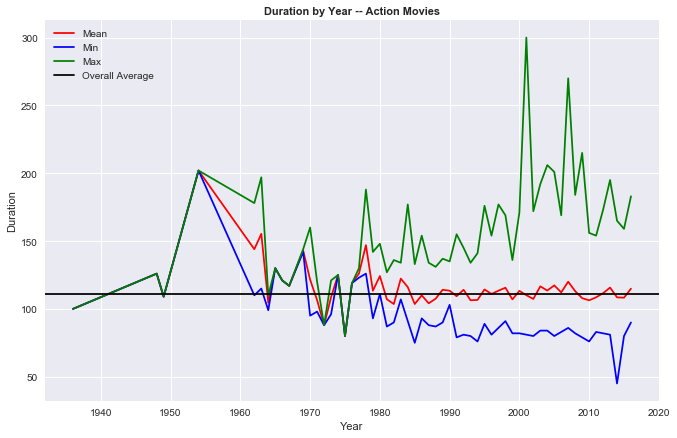

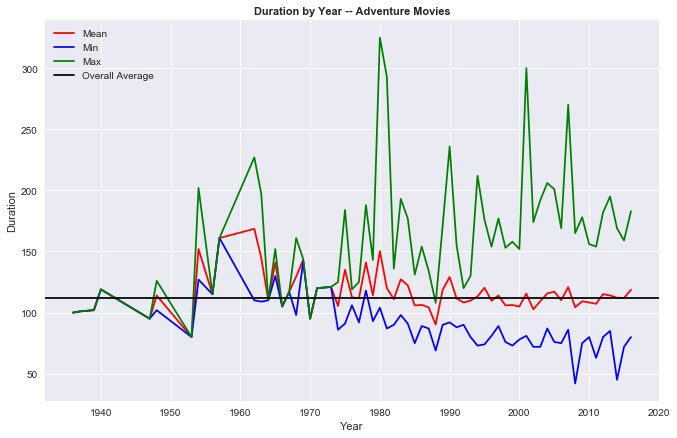

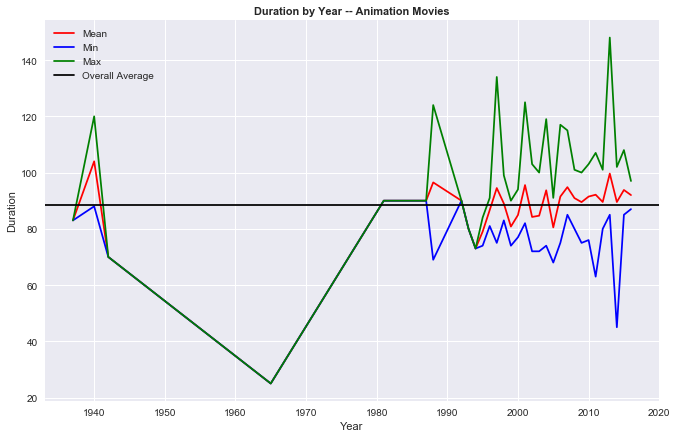

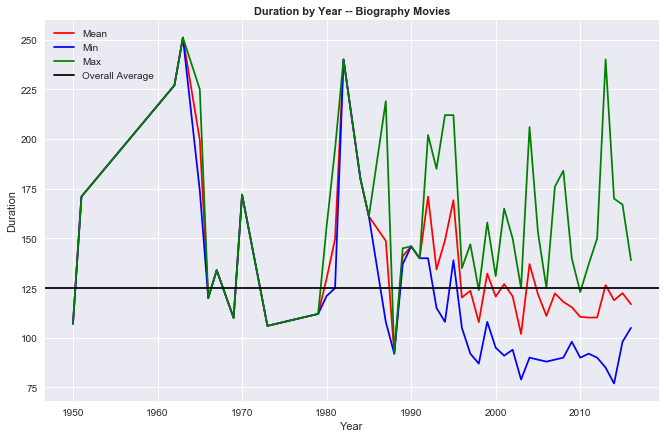

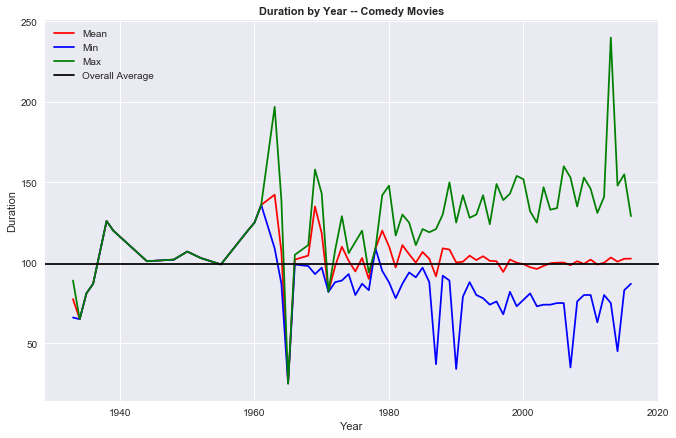

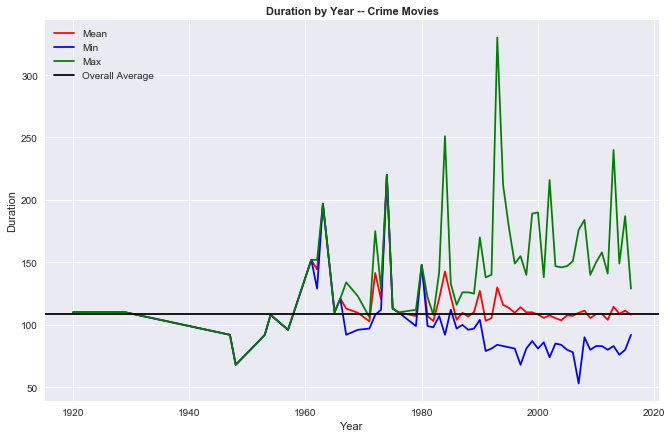

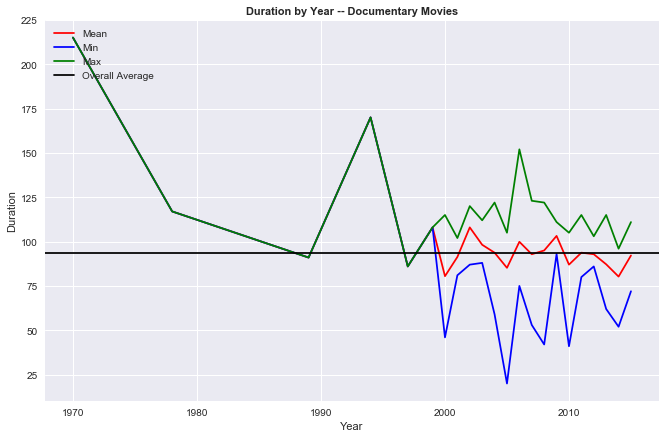

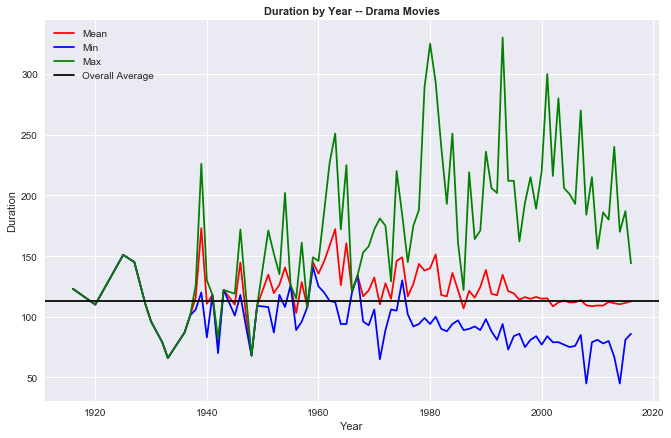

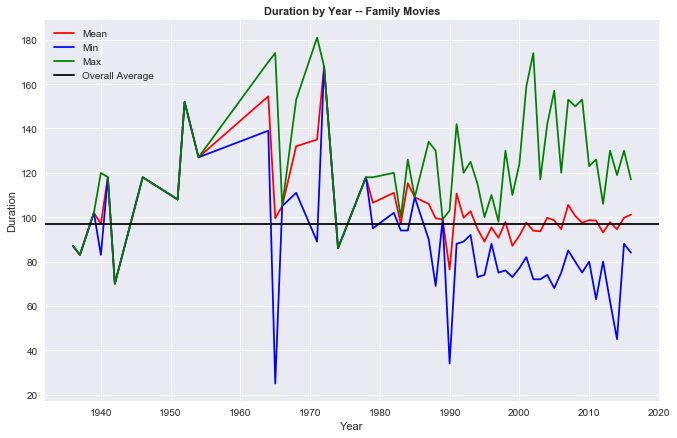

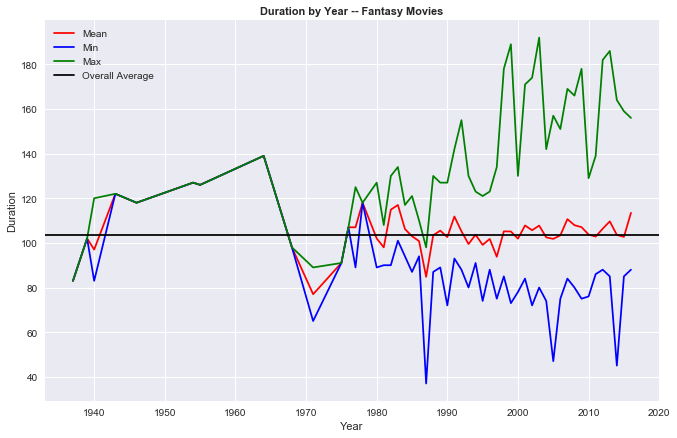

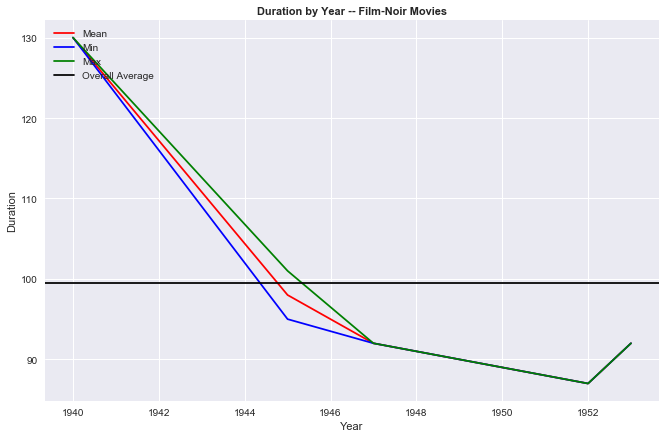

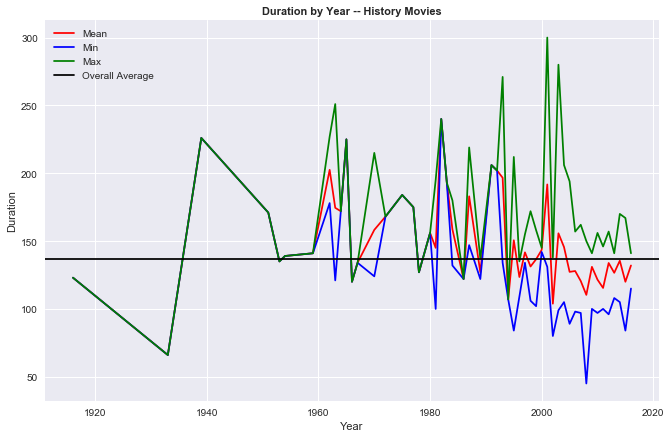

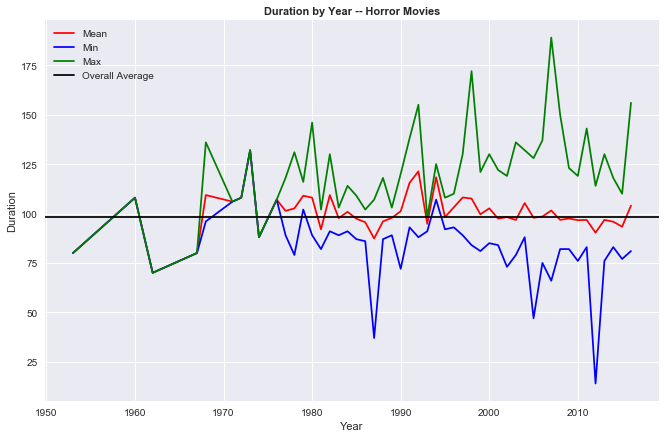

In [3]:
# Create Pivot Tables
genre_list = ['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Film-Noir', 'History', 'Horror'] 
for genre_name in genre_list:
    genre_data = movie_data[movie_data["genres"].str.contains (genre_name)]

    genre_mean_dur_by_year = genre_data.pivot_table(index="title_year", values="duration", aggfunc=numpy.mean)
    genre_min_dur_by_year = genre_data.pivot_table(index="title_year", values="duration", aggfunc=numpy.min)
    genre_max_dur_by_year = genre_data.pivot_table(index="title_year", values="duration", aggfunc=numpy.max)

    dur_is_null = pd.isnull(genre_data.duration)
    only_good_data = genre_data.duration[dur_is_null == False]
    genre_mean = only_good_data.mean(axis=0)

    # Display the data
    # Change the default style
    plt.style.use('seaborn')
    plt.figure(figsize=(11,7))

    genre_title = 'Duration by Year -- ' + genre_name + ' Movies'
    plt.ylabel('Duration')
    plt.xlabel('Year')
    plt.title(genre_title, weight="bold", fontsize=11)
    plt.plot(genre_mean_dur_by_year, "r",label="Mean")
    plt.plot(genre_min_dur_by_year, "b", label="Min")
    plt.plot(genre_max_dur_by_year, "g", label="Max")
    plt.axhline(y=genre_mean, color='k', label="Overall Average")
    plt.legend(loc='upper left')
    plt.show()

# Conclusion:

Movies overall really aren''t getting longer -- the average run-time is remarkably consistant, and the max isn''t growing, either.  However, while the average run-time for fantasy films is fair consistant, the longest run-time is certainly growing.

Further exploration of spikes could be interesting.